In [59]:
%pip install xgboost
%pip install   lightgbm
%pip install shap
import warnings
warnings.filterwarnings("ignore")


Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
    PyYAML (>=5.1.*)
            ~~~~~~^
    torch (>=1.9.*)
           ~~~~~~^
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
    PyYAML (>=5.1.*)
            ~~~~~~^
    torch (>=1.9.*)
           ~~~~~~^
Note: you may need to restart the kernel to use updated packages.
Looking in indexes: https://mirrors.cloud.aliyuncs.com/pypi/simple
    PyYAML (>=5.1.*)
            ~~~~~~^
    torch (>=1.9.*)
           ~~~~~~^
Note: you may need to restart the kernel to use updated packages.


In [60]:
# 忽视警告
import warnings
warnings.simplefilter('ignore')

# 数据处理
import numpy as np
import pandas as pd
# 数据可视化
import matplotlib.pyplot as plt
import seaborn as sns 
# 随机森林
from sklearn.ensemble import RandomForestClassifier 
# 策树
from sklearn.tree import DecisionTreeClassifier
# 树的可视化
from sklearn.tree import export_graphviz 
# 模型评估方法
from sklearn.metrics import roc_curve, auc 
from sklearn.metrics import classification_report 
#混淆矩阵
from sklearn.metrics import confusion_matrix 
# 数据切分
from sklearn.model_selection import train_test_split 
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from matplotlib.cm import get_cmap  # new
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.base import BaseEstimator, ClassifierMixin  # 导入 BaseEstimator 和 ClassifierMixin
from pdpbox import pdp


# 读取 CSV 文件
dt = pd.read_csv("./data/heart.csv")

# 查看数据的前几行
print(dt.head())
np.random.seed(123) 
pd.options.mode.chained_assignment = None  
#突图标嵌入 不弹窗
%matplotlib inline

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [61]:
dt = pd.read_csv("./data/heart.csv")
dt.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [62]:
# 统计"target"列各类别的总数 检查平衡性
dt.target.value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [63]:
# 设置可视化风格
sns.set(palette=["#66ccff"], rc={"figure.figsize": (8, 4),  # 图形大小
                                "axes.titlesize": 14,    # 标题文字尺寸
                                "axes.labelsize": 12,    # 坐标轴标签文字尺寸
                                "xtick.labelsize": 10,   # X轴刻度文字尺寸
                                "ytick.labelsize": 10})  # Y轴刻度文字尺寸


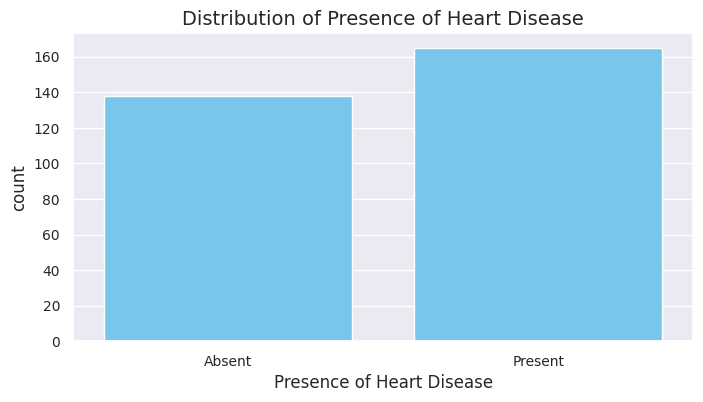

In [64]:
a = sns.countplot(x = 'target', data = dt)               # 绘制计数图，其中x为target，数据为dt
a.set_title('Distribution of Presence of Heart Disease') # 设置图形标题
a.set_xticklabels(['Absent', 'Present'])                 # 将两个条形的标签分别设置为“Absent”（没有心脏病）和“Present”（有心脏病）
plt.xlabel("Presence of Heart Disease")                  # 设置X轴标签


# 显示图形
plt.show()

Text(0.5, 0, 'Age')

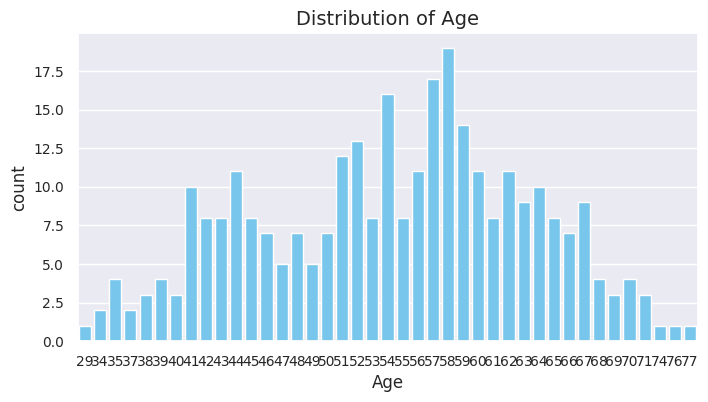

In [65]:
g = sns.countplot(x = 'age', data = dt) # 绘制计数图，其中x为age，数据为dt
g.set_title('Distribution of Age')      # 设置图形标题
plt.xlabel('Age')                       # 设置X轴标签

In [66]:
# 患者性别分布
dt.sex.value_counts()



sex
1    207
0     96
Name: count, dtype: int64

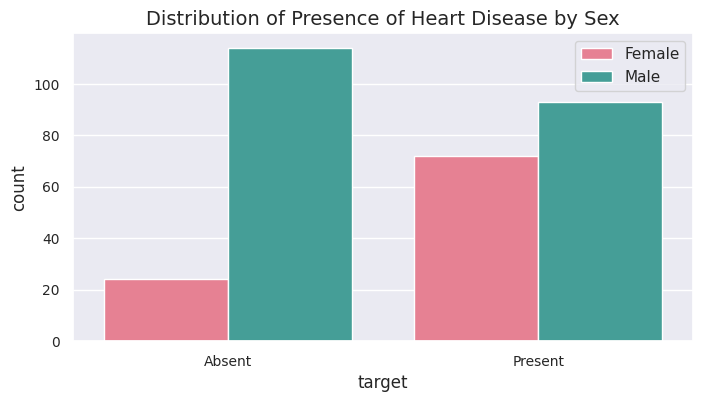

In [67]:
b = sns.countplot(x = 'target', data = dt, hue = 'sex')          # 创建一个计数图，其中x为target，数据为dt，用sex作为色相（切分类别）
plt.legend(['Female', 'Male'])                                    # 以female/male作为标签，在图形中嵌入图例
b.set_title('Distribution of Presence of Heart Disease by Sex')   # 设置图形标题
b.set_xticklabels(['Absent', 'Present'])                          # 设置条形图的标签

# 显示图形
plt.show()

<Axes: xlabel='chol', ylabel='Density'>

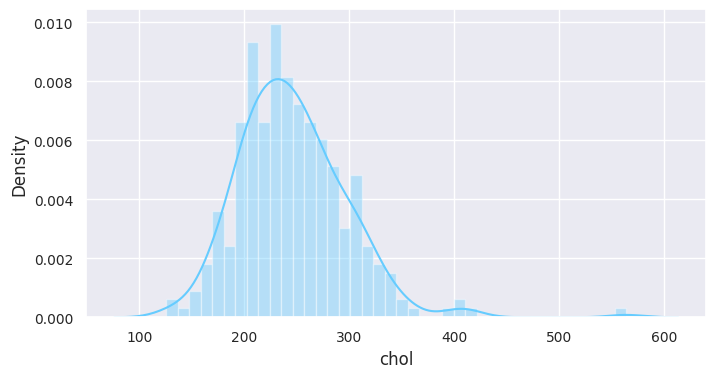

In [68]:
# 可视化病患血清胆固醇浓度分布 
# 高胆固醇（**`chol`** 血清胆固醇浓度）
#高血压（**`trestbps`** 病人(入院时)的静息血压）
#糖尿病（**`fbs`** 空腹血糖浓度）
# 遗传（**`thal`**: 地中海贫血）
sns.distplot(dt['chol'].dropna(), kde=True, color='#66ccff', bins=40)

<Axes: xlabel='trestbps', ylabel='Density'>

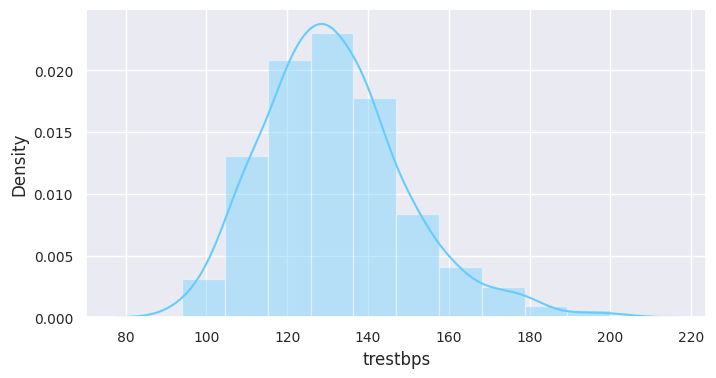

In [69]:
# 可视化病人(入院时)的静息血压分布
sns.distplot(dt['trestbps'].dropna(), kde=True, color='#66ccff', bins=10)

Text(0.5, 0, 'Fasting blood sugar')

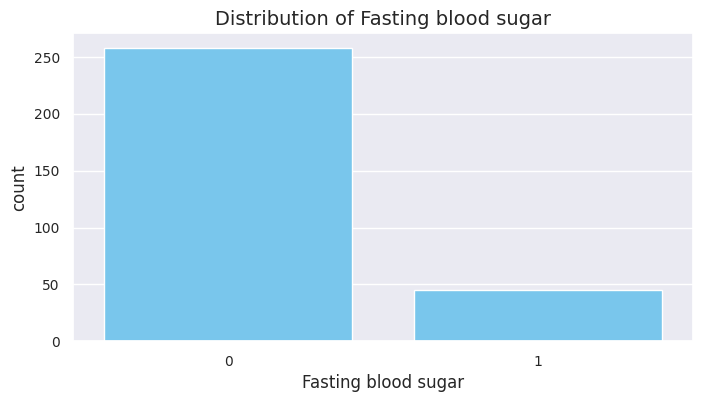

In [70]:
# 可视化病人空腹血糖浓度分布
g = sns.countplot(x = 'fbs', data = dt)                 # 绘制计数图，其中x为fbs，数据为dt
g.set_title('Distribution of Fasting blood sugar')      # 设置图形标题
plt.xlabel('Fasting blood sugar')                       # 设置X轴标签

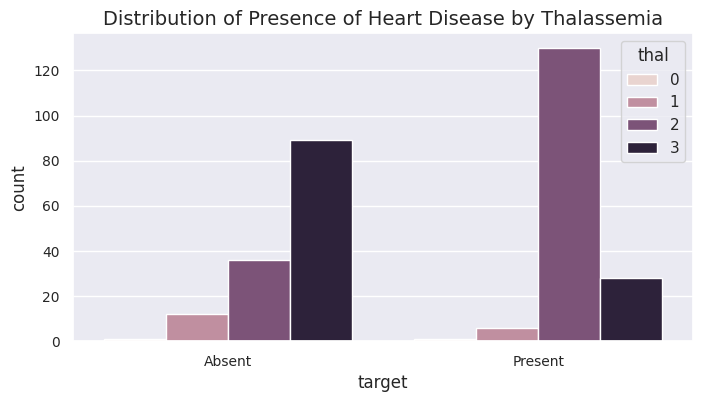

In [71]:
b = sns.countplot(x = 'target', data = dt, hue = 'thal')                # 创建一个计数图，
                                                                        # 其中x为target，数据为dt，
                                                                        # 用thal作为色相（切分类别）
b.set_title('Distribution of Presence of Heart Disease by Thalassemia') # 设置图形标题
b.set_xticklabels(['Absent', 'Present'])                                # 设置条形图的标签

# 显示图形
plt.show()

In [72]:
df=dt.copy() # 拷贝一个副本操作
df['age_category'] = pd.cut(df.age, bins = list(np.arange(25, 85, 5)))

Text(0, 0.5, 'Count')

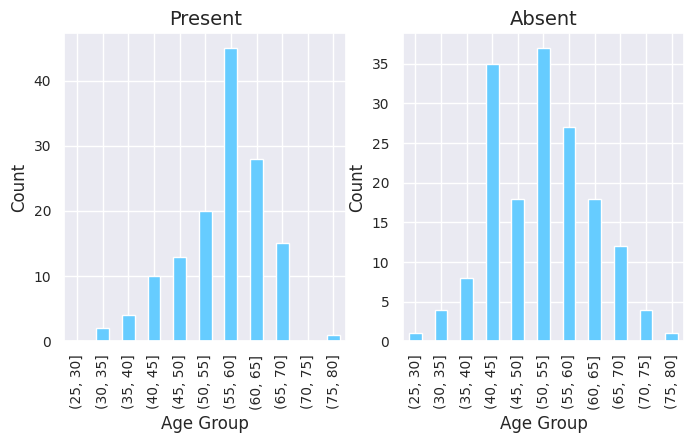

In [73]:
# 将 .groupby 函数应用于目标 == 0（患有心脏病的人）到副本 dataframe `df`，并按 `age_category` 列进行分组
# 使用 age 列上的 .count() 函数来计算每个年龄类别中有多少患者患有心脏病
# 将 kind 参数设置为 bar ，将 .plot() 应用于此以绘制条形图
plt.subplot(121)
df[df.target == 0].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Present')
plt.xlabel('Age Group')
plt.ylabel('Count')

# 和患有心脏病的处理方式一致，这里得到没有心脏病的患者分布情况
plt.subplot(122)
df[df.target == 1].groupby('age_category')['age'].count().plot(kind = 'bar')
plt.title('Absent')
plt.xlabel('Age Group')
plt.ylabel('Count')

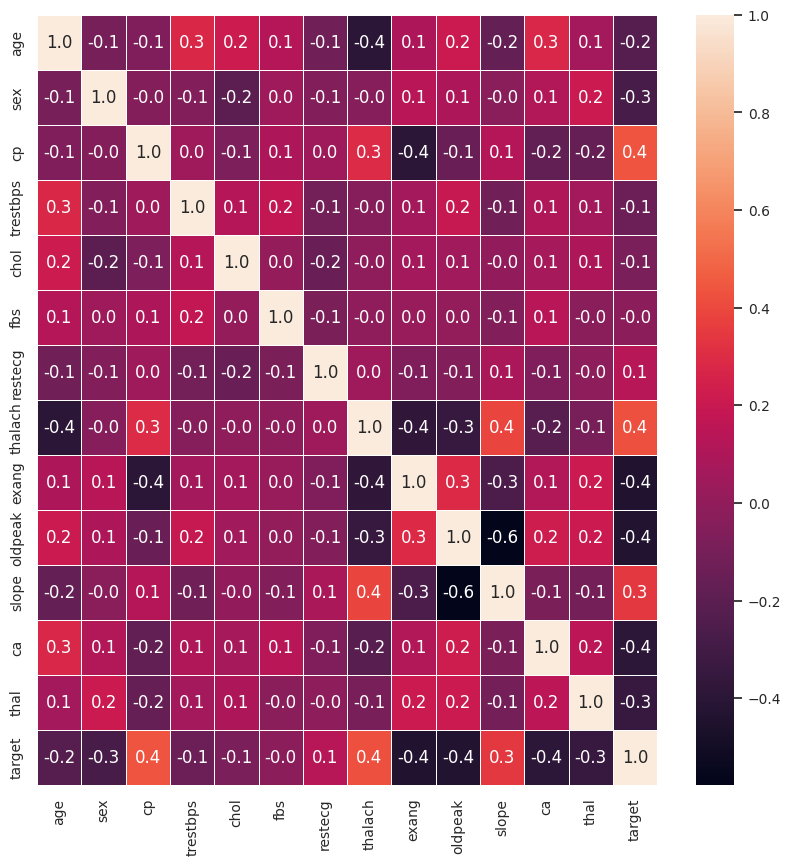

In [74]:
f,ax = plt.subplots(figsize=(10,10)) # 定义图形尺寸
# 根据计算的相关值绘制热力图
sns.heatmap(dt.corr('pearson'), annot = True, linewidths = .5, fmt =  '.1f', ax = ax)

# 显示特征相关性热力图
plt.show()

数据预处理

In [75]:
#重命名
dt.columns = ['age', 
              'sex', 
              'chest_pain_type', 
              'resting_blood_pressure', 
              'cholesterol', 
              'fasting_blood_sugar', 
              'rest_ecg', 
              'max_heart_rate_achieved',
              'exercise_induced_angina', 
              'st_depression', 
              'st_slope', 
              'num_major_vessels', 
              'thalassemia', 'target']
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate_achieved  303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [76]:
# 使用"astype"指定数据类型
dt['sex'] = dt['sex'].astype('object')
dt['chest_pain_type'] = dt['chest_pain_type'].astype('object')
dt['fasting_blood_sugar'] = dt['fasting_blood_sugar'].astype('object')
dt['rest_ecg'] = dt['rest_ecg'].astype('object')
dt['exercise_induced_angina'] = dt['exercise_induced_angina'].astype('object')
dt['st_slope'] = dt['st_slope'].astype('object')
dt['thalassemia'] = dt['thalassemia'].astype('object')
dt.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [77]:
# 对object数据类型进行编码
# 将"female"编码为0，将"male"编码为1
# 下面的编码方式类似
dt['sex'][dt['sex'] == 0] = 'female'
dt['sex'][dt['sex'] == 1] = 'male'

dt['chest_pain_type'][dt['chest_pain_type'] == 1] = 'typical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 2] = 'atypical angina'
dt['chest_pain_type'][dt['chest_pain_type'] == 3] = 'non-anginal pain'
dt['chest_pain_type'][dt['chest_pain_type'] == 4] = 'asymptomatic'

dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dt['fasting_blood_sugar'][dt['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dt['rest_ecg'][dt['rest_ecg'] == 0] = 'normal'
dt['rest_ecg'][dt['rest_ecg'] == 1] = 'ST-T wave abnormality'
dt['rest_ecg'][dt['rest_ecg'] == 2] = 'left ventricular hypertrophy'

dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 0] = 'no'
dt['exercise_induced_angina'][dt['exercise_induced_angina'] == 1] = 'yes'

dt['st_slope'][dt['st_slope'] == 1] = 'upsloping'
dt['st_slope'][dt['st_slope'] == 2] = 'flat'
dt['st_slope'][dt['st_slope'] == 3] = 'downsloping'

dt['thalassemia'][dt['thalassemia'] == 1] = 'normal'
dt['thalassemia'][dt['thalassemia'] == 2] = 'fixed defect'
dt['thalassemia'][dt['thalassemia'] == 3] = 'reversable defect'
dt.head().T

,0,1,2,3,4
age,63,37,41,56,57
sex,male,male,female,male,female
chest_pain_type,non-anginal pain,atypical angina,typical angina,typical angina,0
resting_blood_pressure,145,130,130,120,120
cholesterol,233,250,204,236,354
fasting_blood_sugar,greater than 120mg/ml,lower than 120mg/ml,lower than 120mg/ml,lower than 120mg/ml,lower than 120mg/ml
rest_ecg,normal,ST-T wave abnormality,normal,ST-T wave abnormality,ST-T wave abnormality
max_heart_rate_achieved,150,187,172,178,163
exercise_induced_angina,no,no,no,no,yes
st_depression,2.3,3.5,1.4,0.8,0.6


In [78]:
# 调用"get_dummies"进行独热编码
dt = pd.get_dummies(dt, drop_first=True) 
dt.head().T

,0,1,2,3,4
age,63,37,41,56,57
resting_blood_pressure,145,130,130,120,120
cholesterol,233,250,204,236,354
max_heart_rate_achieved,150,187,172,178,163
st_depression,2.3,3.5,1.4,0.8,0.6
num_major_vessels,0,0,0,0,0
target,1,1,1,1,1
sex_male,True,True,False,True,False
chest_pain_type_atypical angina,False,True,False,False,False
chest_pain_type_non-anginal pain,True,False,False,False,False


In [79]:
#划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(dt.drop(columns='target'),
                                                    dt['target'],
                                                    test_size=0.2,
                                                    random_state=42)

In [80]:
# 定义逻辑回归模型
lr = LogisticRegression()

# 定义参数网格
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # 正则化强度的倒数
    'penalty': ['l1', 'l2'],       # 正则化类型
    'solver': ['liblinear']        # 优化算法（liblinear 支持 l1 和 l2）
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=lr,  # 模型
    param_grid=param_grid,  # 参数网格
    cv=5,  # 五折交叉验证
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    n_jobs=-1  # 使用所有可用的CPU核心
)

# 在训练集上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 使用最佳参数训练模型
best_lr = grid_search.best_estimator_

# 在测试集上进行预测
y_pred_lr = best_lr.predict(X_test)

# 输出混淆矩阵
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

# 输出分类报告
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

# 输出 AUC
y_pred_proba = best_lr.predict_proba(X_test)[:, 1]  # 获取正类的概率
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

最佳参数组合: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Confusion Matrix:
 [[27  2]
 [ 4 28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61

测试集 AUC:  0.9504310344827587


最佳阈值: 0.3199999999999999
最大准确率: 0.9016393442622951


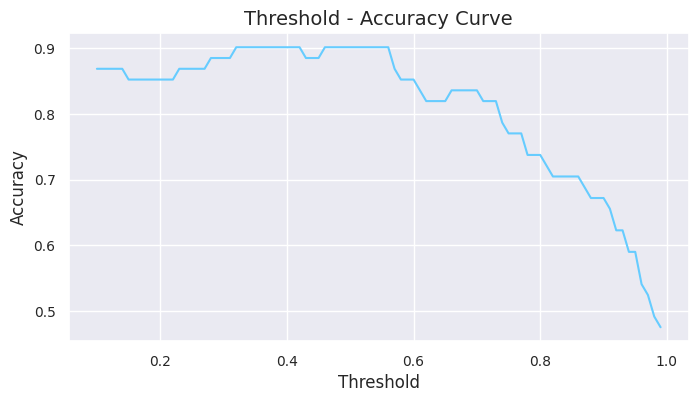

In [81]:
#二次调参
accuracies = []
thresholds = np.arange(0.1, 1, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 找到最大准确率及其对应的阈值
max_accuracy_index = np.argmax(accuracies)
optimal_threshold = thresholds[max_accuracy_index]
max_accuracy = accuracies[max_accuracy_index]

print(f"最佳阈值: {optimal_threshold}")
print(f"最大准确率: {max_accuracy}")

# 绘制阈值 - 准确率曲线
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold - Accuracy Curve')
plt.show()

In [82]:
# 朴素贝叶斯
print("Naive Bayes:")
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict_proba(X_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_nb))

Naive Bayes:
AUC:  0.8997844827586207


In [83]:
# 定义朴素贝叶斯模型
nb = GaussianNB()

# 定义参数网格
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # 方差平滑参数
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=nb,  # 模型
    param_grid=param_grid,  # 参数网格
    cv=5,  # 五折交叉验证
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    n_jobs=-1  # 使用所有可用的CPU核心
)

# 在训练集上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 使用最佳参数训练模型
best_nb = grid_search.best_estimator_

# 在测试集上进行预测
y_pred_proba = best_nb.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

最佳参数组合: {'var_smoothing': 1e-05}
测试集 AUC:  0.9181034482758621


In [84]:
# 定义随机森林模型
rf = RandomForestClassifier(random_state=42)

# 定义参数网格
param_grid = {
    'n_estimators': [ 100, 150,50],  # 树的数量
    'max_depth': [None, 10,20],     # 每棵树的最大深度
    
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=rf,  # 模型
    param_grid=param_grid,  # 参数网格
    cv=5,  # 五折交叉验证
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    n_jobs=-1  # 使用所有可用的CPU核心
)

# 在训练集上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 使用最佳参数训练模型
best_rf = grid_search.best_estimator_

# 在测试集上进行预测
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

最佳参数组合: {'max_depth': 10, 'n_estimators': 50}
测试集 AUC:  0.9186422413793103


In [85]:
# 定义随机森林模型（使用默认参数）
rf = RandomForestClassifier(random_state=42)

# 训练模型
rf.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_proba = rf.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print(" AUC: ", roc_auc_score(y_test, y_pred_proba))
print("Random Forest Parameters: ")
print(rf.get_params())

 AUC:  0.9224137931034483
Random Forest Parameters: 
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


最佳阈值: 0.29999999999999993
最大准确率: 0.8852459016393442


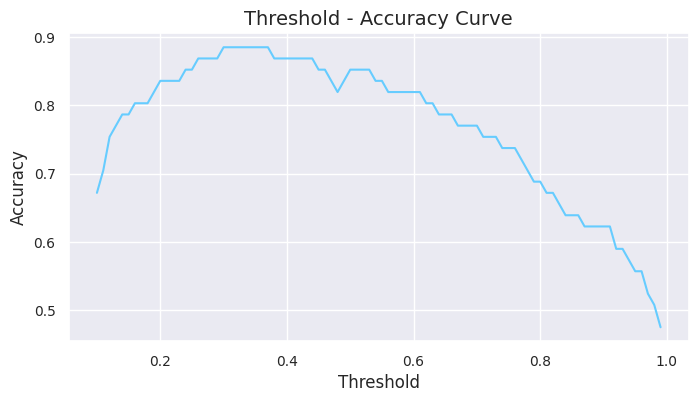

In [86]:
accuracies = []
thresholds = np.arange(0.1, 1, 0.01)

for threshold in thresholds:
    y_pred = (y_pred_proba >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# 找到最大准确率及其对应的阈值
max_accuracy_index = np.argmax(accuracies)
optimal_threshold = thresholds[max_accuracy_index]
max_accuracy = accuracies[max_accuracy_index]

print(f"最佳阈值: {optimal_threshold}")
print(f"最大准确率: {max_accuracy}")

# 绘制阈值 - 准确率曲线
plt.plot(thresholds, accuracies)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Threshold - Accuracy Curve')
plt.show()

In [87]:
# XGBoost
print("XGBoost:")
xgb_model = xgb.XGBClassifier()
param_grid_xgb = {'max_depth': [3, 6], 'learning_rate': [0.01, 0.1], 'n_estimators': [100, 200]}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=3, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)
print("Best parameters found: ", grid_xgb.best_params_)
y_pred_xgb = grid_xgb.predict_proba(X_test)[:, 1]
print("AUC: ", roc_auc_score(y_test, y_pred_xgb))

XGBoost:
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}
AUC:  0.896551724137931


In [88]:
# 定义 XGBoost 模型
xgb_model = xgb.XGBClassifier(random_state=42)

# 定义参数网格
param_grid = {
    'max_depth': [3, 6, 9],  # 树的最大深度
    'learning_rate': [0.01, 0.1, 0.3],  # 学习率
    'n_estimators': [100, 200, 300],  # 树的数量
    'subsample': [0.8, 1.0],  # 样本采样比例
    'colsample_bytree': [0.8, 1.0]  # 特征采样比例
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=xgb_model,  # 模型
    param_grid=param_grid,  # 参数网格
    cv=5,  # 五折交叉验证
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    n_jobs=-1  # 使用所有可用的CPU核心
)

# 在训练集上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 使用最佳参数训练模型
best_xgb = grid_search.best_estimator_

# 在测试集上进行预测
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_test, y_pred_proba))

最佳参数组合: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 200, 'subsample': 1.0}
测试集 AUC:  0.915948275862069


In [89]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split


# 定义基础模型
base_models = [
    ('lr', LogisticRegression(C=1, penalty='l2', solver='liblinear')),
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100))
]

# 训练模型并获取预测概率
probabilities = {}
for name, model in base_models:
    model.fit(X_train, y_train)
    probabilities[name] = model.predict_proba(X_test)[:, 1]  # 获取正类概率

# 网格搜索权重组合
weights = np.linspace(0, 1, 11)
best_auc = 0
best_weights = {}

# 三维网格搜索优化权重
for w_lr in weights:
    for w_rf in weights:
        for w_xgb in weights:
            if np.isclose(w_lr + w_rf + w_xgb, 1.0):
                # 加权平均概率
                weighted_prob = (w_lr * probabilities['lr'] +
                                 w_rf * probabilities['rf'] +
                                 w_xgb * probabilities['xgb'])
                
                # 计算AUC
                auc = roc_auc_score(y_test, weighted_prob)
                
                # 更新最佳权重和AUC
                if auc > best_auc:
                    best_auc = auc
                    best_weights = {'lr': w_lr, 'rf': w_rf, 'xgb': w_xgb}

# 输出结果
print(f"最佳权重组合：{best_weights}")
print(f"验证集AUC：{best_auc:.4f}")


最佳权重组合：{'lr': 0.9, 'rf': 0.0, 'xgb': 0.1}
验证集AUC：0.9504


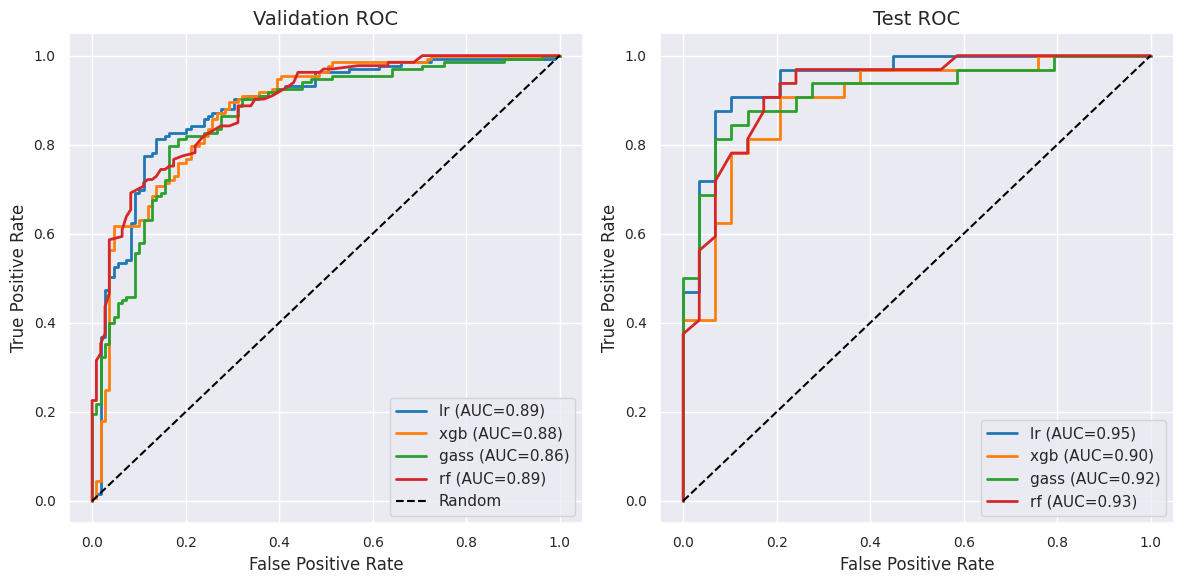

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier


# 新增科学色板配置
cmap = get_cmap('tab10')  # 使用Matplotlib内置科学色板
model_colors = [cmap(i) for i in range(4)]  # 生成4种对比色

# 修正后的模型列表
models = [
    ('lr', LogisticRegression(C=1, penalty='l2', solver='liblinear')),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, use_label_encoder=False, eval_metric='logloss')),
    ('gass', GaussianNB(var_smoothing=1e-5)),
    ('rf', RandomForestClassifier())
]

# 绘制验证集 & 测试集 ROC 曲线
plt.figure(figsize=(12, 6))

# 子图1：验证集
plt.subplot(1, 2, 1)
for idx, (name, model) in enumerate(models):  # new: 增加索引
    y_pred_val = cross_val_predict(model, X_train, y_train, cv=5, method='predict_proba')[:, 1]
    fpr, tpr, _ = roc_curve(y_train, y_pred_val)  # 确保输入是一维数组
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 
             color=model_colors[idx],  # new: 按索引分配颜色
             lw=2, 
             label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random')
plt.title("Validation ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# 子图2：测试集
plt.subplot(1, 2, 2)
for idx, (name, model) in enumerate(models):  # new: 增加索引
    model.fit(X_train, y_train)
    y_pred_test = model.predict_proba(X_test)[:, 1]  # 确保输入是一维数组
    fpr, tpr, _ = roc_curve(y_test, y_pred_test)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, 
             color=model_colors[idx],  # new: 保持颜色一致性
             lw=2, 
             label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')
plt.title("Test ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.tight_layout()
plt.show()

Training lr...
Training xgb...
Training gass...
Training rf...


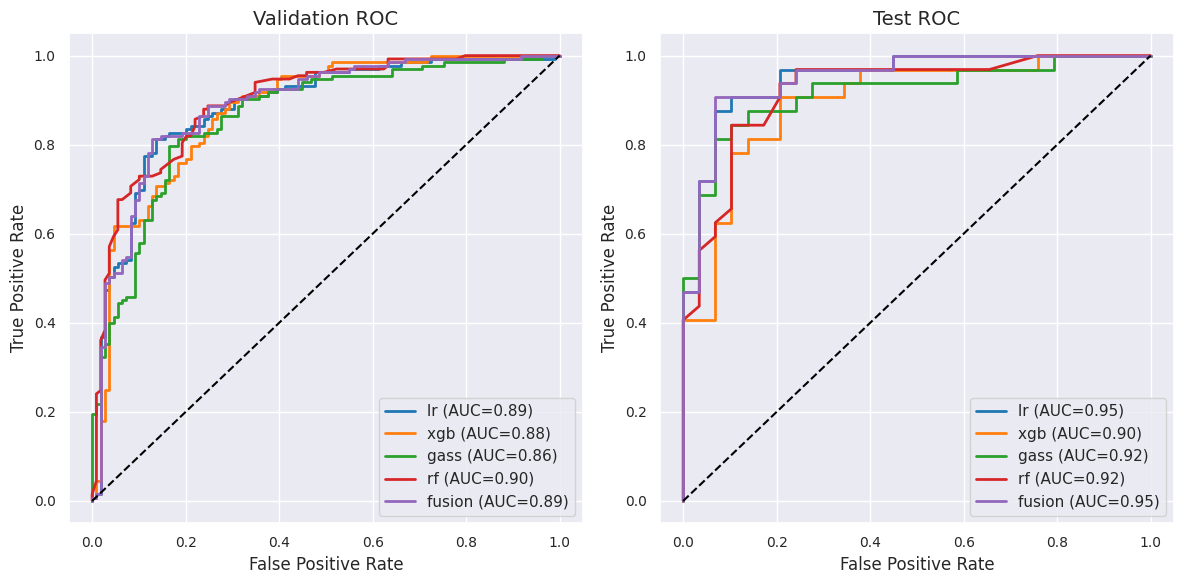

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

# 假设你已经加载了数据集 X_train, y_train, X_test, y_test
# 如果没有，可以使用以下示例数据：
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# ========== 初始化配置 ========== #
# 明确定义基础模型列表
base_models = [
    ('lr', LogisticRegression(C=1, penalty='l2', solver='liblinear')),
    ('xgb', XGBClassifier(learning_rate=0.1, max_depth=3, n_estimators=100, use_label_encoder=False, eval_metric='logloss')),
    ('gass', GaussianNB(var_smoothing=1e-5)),
    ('rf', RandomForestClassifier())
]

# 包含融合模型的完整列表
full_models = [*base_models, ('fusion', None)]

# ========== 科学配色方案 ========== #
cmap = get_cmap('tab10')  # 支持最多10种颜色
model_colors = [cmap(i) for i in range(len(full_models))]  # 颜色索引绑定

# ========== 模型训练与预测 ========== #
# 初始化预测存储字典
base_probs_val = {name: None for name, _ in base_models}
base_probs_test = {name: None for name, _ in base_models}

for name, model in base_models:
    print(f"Training {name}...")
    # 验证集交叉验证预测
    base_probs_val[name] = cross_val_predict(
        model, X_train, y_train, 
        cv=5, method='predict_proba'
    )[:, 1]
    
    # 测试集预测
    model.fit(X_train, y_train)
    base_probs_test[name] = model.predict_proba(X_test)[:, 1]

# ========== ROC曲线绘制 ========== #
plt.figure(figsize=(12, 6))

# 子图1：验证集ROC
plt.subplot(1, 2, 1)
for idx, (name, model) in enumerate(full_models):
    if name in [m for m, _ in base_models]:  # 基础模型处理
        fpr, tpr, _ = roc_curve(y_train, base_probs_val[name])
        roc_auc = auc(fpr, tpr)
    elif name == 'fusion':  # 融合模型处理
        weighted_prob = 0.9 * base_probs_val['lr'] + 0.1 * base_probs_val['xgb']
        fpr, tpr, _ = roc_curve(y_train, weighted_prob)
        roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, color=model_colors[idx], lw=2,
             label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Validation ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# 子图2：测试集ROC
plt.subplot(1, 2, 2)
for idx, (name, model) in enumerate(full_models):
    if name in [m for m, _ in base_models]:
        y_pred = base_probs_test[name]
    elif name == 'fusion':
        y_pred = 0.9 * base_probs_test['lr'] + 0.1 * base_probs_test['xgb']
    
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color=model_colors[idx], lw=2,
             label=f'{name} (AUC={roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title("Test ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.tight_layout()
plt.show()

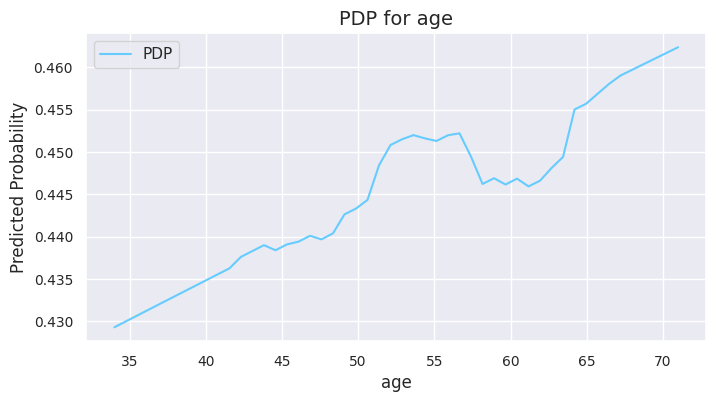

In [92]:
base_models = [
    ('lr', LogisticRegression(C=1, penalty='l2', solver='liblinear')),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', xgb.XGBClassifier(learning_rate=0.1, max_depth=6, n_estimators=200, random_state=42))
]

# 最佳权重组合
best_weights = {'lr': 0.9, 'rf': 0.0, 'xgb': 0.1}
class WeightedEnsembleClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, base_models, weights):
        self.base_models = base_models
        self.weights = weights

    def fit(self, X, y):
        for name, model in self.base_models:
            model.fit(X, y)
        return self

    def predict_proba(self, X):
        all_preds = np.array([model.predict_proba(X) for name, model in self.base_models])
        # 使用权重加权平均
        weighted_preds = np.average(all_preds, axis=0, weights=[self.weights[name] for name, _ in self.base_models])
        return weighted_preds

    def predict(self, X):
        proba = self.predict_proba(X)
        return np.argmax(proba, axis=1)
    # 初始化加权融合模型
ensemble_model = WeightedEnsembleClassifier(base_models=base_models, weights=best_weights)

# 训练模型
ensemble_model.fit(X_train, y_train)# 定义要分析的特征
feat_name = 'age'  # 假设数据集中有一个名为'age'的特征
base_features = X_train.columns  # 假设X_train是DataFrame格式

# 如果X_train是numpy数组，需要转换为DataFrame
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train, columns=[f"feature_{i}" for i in range(X_train.shape[1])])
    X_test = pd.DataFrame(X_test, columns=[f"feature_{i}" for i in range(X_test.shape[1])])

# 确保feat_name在数据集中
if feat_name not in X_train.columns:
    raise ValueError(f"Feature '{feat_name}' not found in the dataset.")

# 手动计算PDP
def manual_pdp_plot(model, X_test, feature_name):
    # 获取特征的范围
    feature_values = np.linspace(X_test[feature_name].min(), X_test[feature_name].max(), 50)
    pdp_values = []

    for value in feature_values:
        # 创建一个副本，将特征值替换为当前值
        temp_X = X_test.copy()
        temp_X[feature_name] = value
        # 计算预测概率的平均值
        avg_pred = model.predict_proba(temp_X)[:, 1].mean()
        pdp_values.append(avg_pred)

    # 绘制PDP
    plt.plot(feature_values, pdp_values, label='PDP')
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Probability')
    plt.title(f'PDP for {feature_name}')
    plt.legend()
    plt.show()

# 绘制特征'age'的PDP
manual_pdp_plot(ensemble_model, X_test, feat_name)

In [93]:
# 训练随机森林模型
import shap
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 使用 SHAP 解释模型
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test, check_additivity=False)  # 禁用加性检查
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

shap_values shape: (61, 19, 2)
shap_values_positive shape: (61, 19)


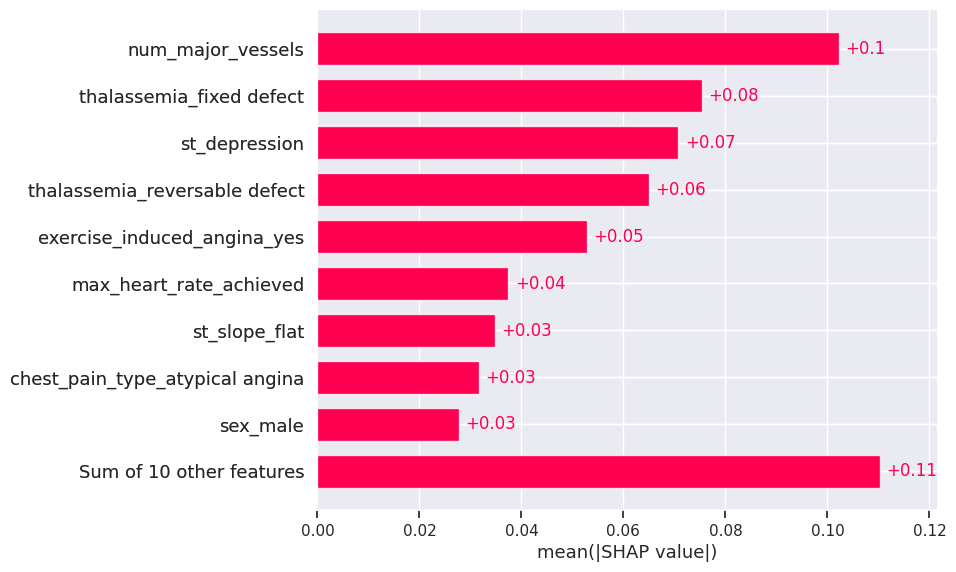

In [96]:
from sklearn.ensemble import RandomForestClassifier
import shap
import numpy as np

# 训练随机森林模型
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# 获取正类的概率
y_pred_proba = rf.predict_proba(X_test)[:, 1]

# 已知的最佳阈值
optimal_threshold = 0.29999999999999993

# 使用最佳阈值调整预测结果
y_pred_optimal = (y_pred_proba >= optimal_threshold).astype(int)

# 使用 shap.Explainer
explainer = shap.Explainer(rf)
shap_values = explainer(X_test)

# 检查 SHAP 值的形状
print("shap_values shape:", shap_values.shape)  # 应该是 (61, 19, 2)

# 提取正类（类别 1）的 SHAP 值
shap_values_positive = shap_values[..., 1]  # 提取最后一个维度的索引为 1 的值
print("shap_values_positive shape:", shap_values_positive.shape)  # 应该是 (61, 19)

# 绘制 SHAP 总结图（条形图）
shap.plots.bar(shap_values_positive)